In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("/content/BostonHousing.csv")


In [ ]:
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
df.shape

(506, 14)

In [9]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [10]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [11]:
x=df.drop('medv',axis=1)
y=df['medv']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
x_train_i=imputer.fit_transform(x_train)
x_test_i=imputer.transform(x_test)


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_s=scaler.fit_transform(x_train_i)
x_test_s=scaler.transform(x_test_i)

In [16]:
from sklearn.linear_model import LinearRegression


In [17]:
model=LinearRegression()
model.fit(x_train_s,y_train)

LinearRegression()

In [18]:
y_pred=model.predict(x_test_s)


In [19]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mead squared Error is:")
print(rmse)

Root Mead squared Error is:
5.508122064664189


In [20]:
#Training accuracy
model.score(x_train_s,y_train)

0.7651662855333496

In [21]:
#Testing accuracy
model.score(x_test_s,y_test)

0.6507629799152581

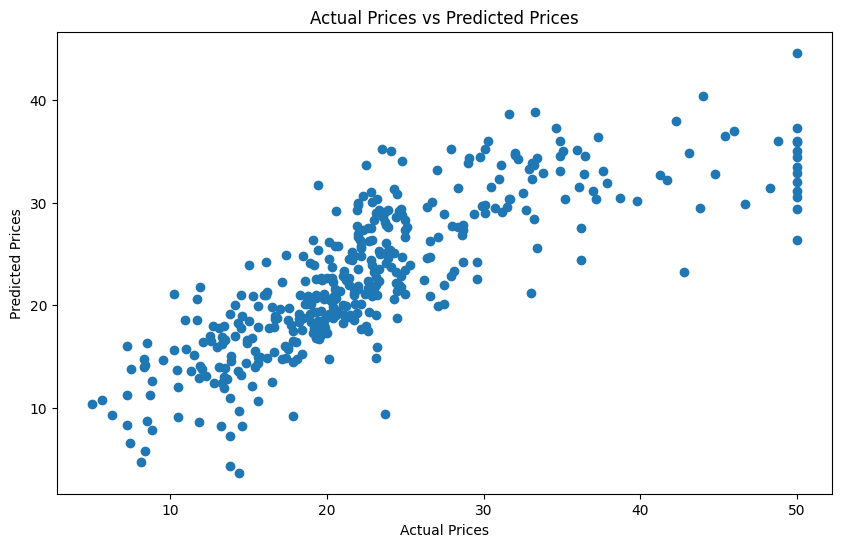

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()